Link for the blog: https://medium.com/@abdul.moeed.asad/exploring-heart-failure-with-data-1de7c6c2086f

# Heart Rate Failure by Data Darbar

For our project we are looking at Medical records of 299 heart failure patients from the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan).

---

## An initial overview


The data was collected during April–December 2015. The dataset is for 105 women and 194 men and their ages range between 40 and 95 years old. The dataset contains 13 features, which report clinical, body, and lifestyle information. It contains some binary features such as if the patient has Anaemia, high blood pressure, diabetes. It also contains information on if the patient smoked.

In

In [ ]:
import numpy as np
import pandas as pd
from os import path
from plotly import graph_objs as go

import plotly.express as px
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk

# palette = ['#F25C78','#5CB9F2']
palette = ['#CC3333','#FFCC99']

# palette = ['#415C4F','#869C80']
# palette = ['#A8AD80','#E6D3A8']

sns.set_palette(palette)

if not path.exists("heart_failure_clinical_records_dataset.csv"):
  !gdown --id 11WtiSHmRBKw75Mf6eWO3SzBZrGNYKBH4
  !unzip heart_dataset.zip
  print("Data loading complete")
else:
  print("Data already loaded")

Downloading...
From: https://drive.google.com/uc?id=11WtiSHmRBKw75Mf6eWO3SzBZrGNYKBH4
To: /content/heart_dataset.zip
100% 4.07k/4.07k [00:00<00:00, 5.73MB/s]
Archive:  heart_dataset.zip
  inflating: heart_failure_clinical_records_dataset.csv  
Data loading complete


In [ ]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

Printing the columns of our dataframe, our 13 features are:

In [ ]:
list(df.columns)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [ ]:
t_info = {'Feature': [
                      'Age',
                      'Anaemia',
                      'High blood pressure',
                      'Creatinine phosphokinase',
                      'Diabetes',
                      'Ejection fraction',
                      'Sex',
                      'Platelets',
                      'Serum creatinine',
                      'Serum sodium',
                      'Smoking',
                      'Time',
                      'Death Event'
                      ],
              'Description' : [
                                'Age of the patient',
                                'Decrease of red blood cells or hemoglobin',
                                'If a patient has hypertension',
                                'Level of the CPK enzyme in the blood',
                                'If the patient has diabetes',
                                'Percentage of blood leaving the heart at each contraction',
                                'Woman or man',
                                'Platelets in the blood',
                                'Level of creatinine in the blood',
                                'Level of sodium in the blood',
                                'If the patient smokes',
                                'Follow-up period',
                                'If the patient died during the follow-up period'
              ],
              'Measurement': [
                              'Years',
                              'Boolean',
                              'Boolean',
                              'mcg/L',

                              'Boolean',
                              'Percentage',

                              'Boolean',
                              'kiloplatelets/mL',
                              'mg/dL',
                              'mEq/L',
                              'Boolean',
                              'Days',
                              'Boolean',
              ],
              'Range': [
                        '40-95',
                        '0,1',
                        '0,1',
                        '23-7861',
                        '0,1',
                        '14-80',
                        '0,1',
                        '25.01-850.00',
                        '0.50-9.40',
                        '114-148',
                        '0,1',
                        '4-285',
                        '0,1',
              ]
              }

from google.colab import data_table

table_info_df = pd.DataFrame(data=t_info)
data_table.DataTable(table_info_df, include_index=False)

,Feature,Description,Measurement,Range
0,Age,Age of the patient,Years,40-95
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,"0,1"
2,High blood pressure,If a patient has hypertension,Boolean,"0,1"
3,Creatinine phosphokinase,Level of the CPK enzyme in the blood,mcg/L,23-7861
4,Diabetes,If the patient has diabetes,Boolean,"0,1"
5,Ejection fraction,Percentage of blood leaving the heart at each ...,Percentage,14-80
6,Sex,Woman or man,Boolean,"0,1"
7,Platelets,Platelets in the blood,kiloplatelets/mL,25.01-850.00
8,Serum creatinine,Level of creatinine in the blood,mg/dL,0.50-9.40
9,Serum sodium,Level of sodium in the blood,mEq/L,114-148


To see what our dataset looks like we will print the first 5 rows.

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Our dataset looks good, however lets confirm that we have no NULL values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We can see that our dataset contains no null values and no missing values. Furthermore, We can also see that all values in our dataset are either integers or floats, making them perfect for analysis of the dataset.

Lets see if we have any unexpected values in our dataset.

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Standard Ranges for Blood Constituents

Our dataset contains data on different blood constituents, and in order to explore how these compare against standard blood ranges, we will be using some ranges determined by authentic sources as a standard for our analysis:

* Creatine Phosphokinase: 10-120 micrograms per liter (mcg/L) (University of California, San Francisco, https://www.ucsfhealth.org/medical-tests/003503)

* Ejection Fraction: 50% - 70% (American Heart Association, https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement#:~:text=A%20normal%20heart's%20ejection%20fraction,failure%20with%20preserved%20ejection%20fraction).

* Platelet Count: 150,000 - 450,000 per microliter (John Hopkins Medicine, https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important#:~:text=A%20normal%20platelet%20count%20ranges,complete%20blood%20count%20(CBC)).

* Serum Creatinine:
  * For adult men, 0.74 to 1.35 mg/dL
  * For adult women, 0.59 to 1.04 mg/dL
  
  (Mayo Clinic, https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646#:~:text=The%20typical%20range%20for%20serum,52.2%20to%2091.9%20micromoles%2FL).
* Serum Sodium: 135-145 milliequivalents per liter (mEq/L) (https://www.ucsfhealth.org/medical-tests/003481)




## Data cleaning

Our data contains no null values, however, it contains redundant features that distract from the dataset and binary values that are hard to make sense of. In order to improve our datasets readability we have done the following proceedures:

### Removing the time variable
The time variable indicates how much time has passed since the patient's last visit for their checkup. We removed the time variable because it carries no significance for our analysis.

### Changing binary values in the sex variable
We changed the sex variable from `1` and `0` to `M` and `F`, respectively to improve the readibility of our dataset.

### Changing name of the "Creatinine Phosphokinase" column
While looking up standard ranges for blood consituents in our dataset, we noticed that one column was mislabelled: CPK stands for Creatine Phosphokinase instead of Createnine, the former being an enzyme while the latter being a waste product of the breakdown of the same enzyme. Hence, we will be changing the column name before proceeding forward in order to avoid any confusion.

### Making all columns lowercase
All columns names were made lowercase in order to make them coherent.

In [ ]:
if 'time' in df.columns:
  df = df.drop('time', axis=1)

my_dict = {
    0: 'F',
    1: 'M',
    'F' : 'F',
    'M' : 'M'
}

df.sex = df.sex.map(my_dict)

df = df.rename(columns = {'creatinine_phosphokinase':'creatine_phosphokinase'})
df.columns = df.columns.str.lower()

df

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,M,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,F,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,F,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,M,1,0


**Great!** Our dataframe is now ready to be worked on.

## Data Exploration

Now that we are finished with data cleaning and have the finalized clean dataset, it's time to visualize our data to better understand it and identify patterns. Firstly, we begin by looking at the ratio of males to females, smokers to non-smokers, diabetic to non-diabetic, high blood pressure to no high blood pressure and anaemia to no anaemia in our data. This gives us a better insight of the proportion of our data set.



Text(0.5, 1.0, 'death')

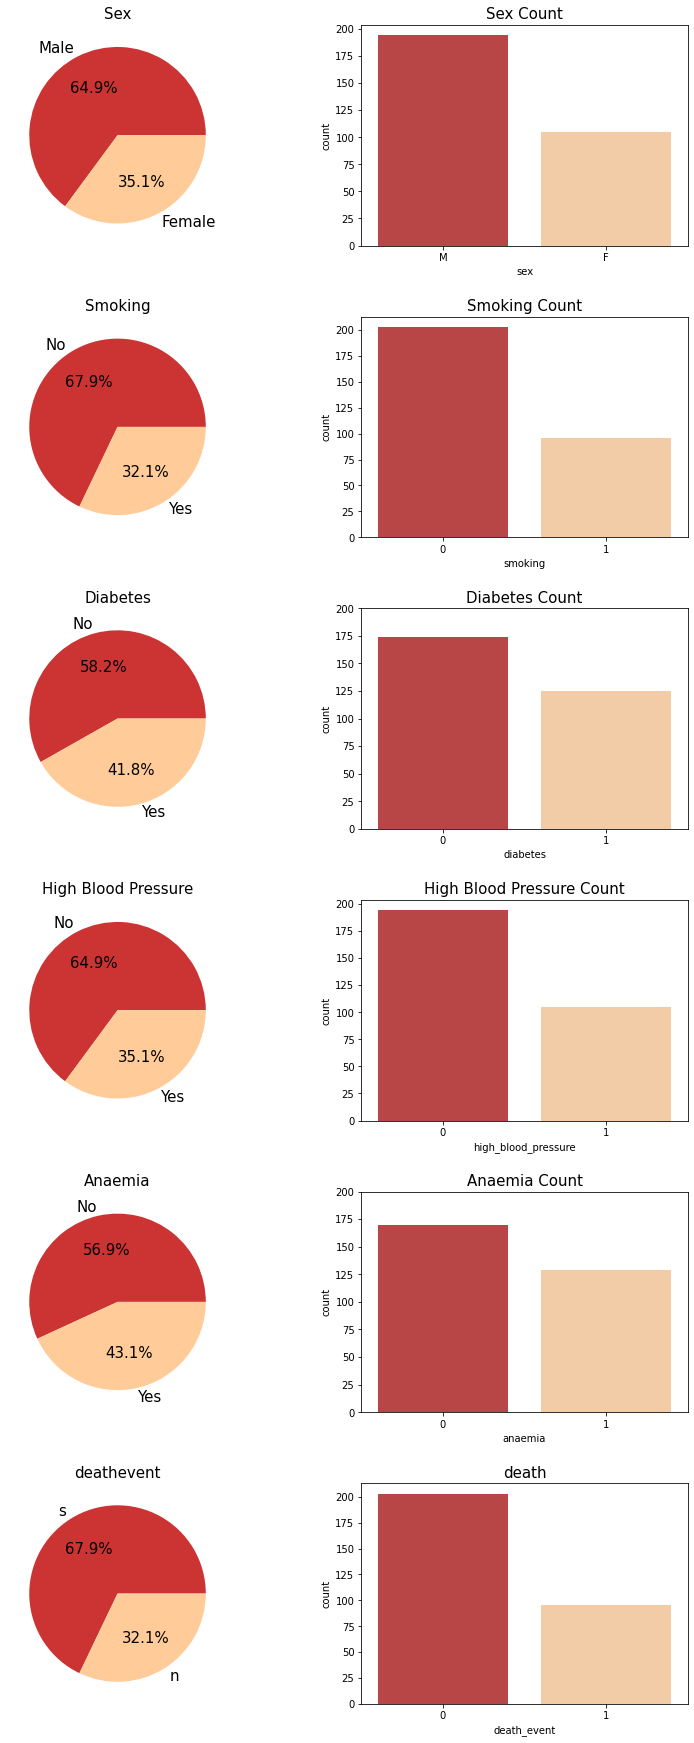

In [ ]:
fig, plot = plt.subplots(6,2, figsize = (12,25))
fig.tight_layout(pad=5.0)

labels = ['Male', 'Female']
a = df['sex'].value_counts().plot.pie(ax = plot[0,0], autopct='%1.1f%%', fontsize = 15, labels=labels)
a.yaxis.set_visible(False)
a.set_title('Sex', fontsize = 15)
sns.countplot(ax = plot[0,1], data= df , x= 'sex')
plot[0,1].set_title('Sex Count', fontsize = 15)

b = df['smoking'].value_counts().plot.pie(ax = plot[1,0], autopct='%1.1f%%', fontsize = 15, labels=['No', 'Yes'])
b.yaxis.set_visible(False)
b.set_title('Smoking', fontsize = 15)
sns.countplot(ax = plot[1,1], data= df , x= 'smoking')
plot[1,1].set_title('Smoking Count', fontsize = 15)

c = df['diabetes'].value_counts().plot.pie(ax = plot[2,0], autopct='%1.1f%%', fontsize = 15, labels=['No', 'Yes'])
c.yaxis.set_visible(False)
c.set_title('Diabetes', fontsize = 15)
sns.countplot(ax = plot[2,1], data= df , x= 'diabetes')
plot[2,1].set_title('Diabetes Count', fontsize = 15)
plot[2,1].set_ylim([0, 200])

d = df['high_blood_pressure'].value_counts().plot.pie(ax = plot[3,0], autopct='%1.1f%%', fontsize = 15, labels=['No', 'Yes'])
d.yaxis.set_visible(False)
d.set_title('High Blood Pressure', fontsize = 15)
sns.countplot(ax = plot[3,1], data= df , x= 'high_blood_pressure')
plot[3,1].set_title('High Blood Pressure Count', fontsize = 15)

e = df['anaemia'].value_counts().plot.pie(ax = plot[4,0], autopct='%1.1f%%', fontsize = 15, labels=['No', 'Yes'])
e.yaxis.set_visible(False)
e.set_title('Anaemia', fontsize = 15)
sns.countplot(ax = plot[4,1], data= df , x= 'anaemia')
plot[4,1].set_title('Anaemia Count', fontsize = 15)
plot[4,1].set_ylim([0, 200])

labels = ['s', 'n']
a = df['death_event'].value_counts().plot.pie(ax = plot[5,0], autopct='%1.1f%%', fontsize = 15, labels=labels)
a.yaxis.set_visible(False)
a.set_title('deathevent', fontsize = 15)
sns.countplot(ax = plot[5,1], data= df , x= 'death_event')
plot[5,1].set_title('death', fontsize = 15)



From the above plots, we see that our data is unbalanced. We have a higher ratio of males as compared to females. Similarly, we have more patients who are non-smokers, non-diabetic and do not have high blood pressure or anaemia.

Now let's see how these different features are related to one another. In order to do that, we create the following heatmap to visualize attributes and their corelations.



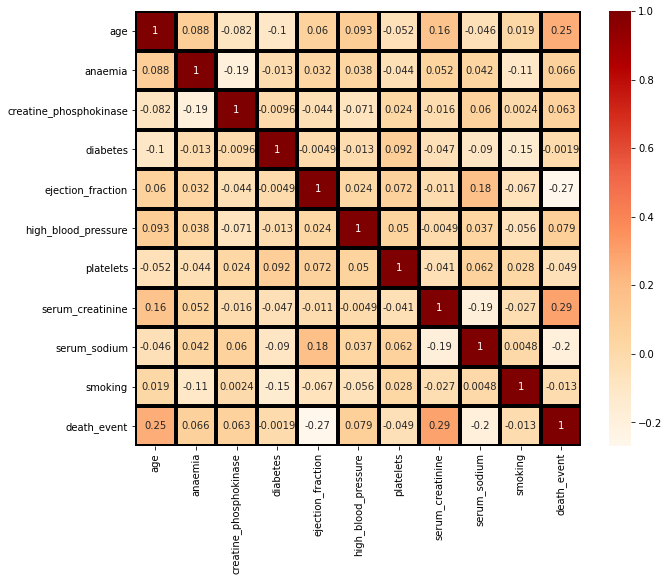

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=3, linecolor='black', ax=ax, cmap = 'OrRd')
plt.show()



It can be observed that the corelation is weak among the different variables, which suggests that there is no underlying corelation in our dataset. It is also possible that an underlying corelation is not visible on the heat map because of the small size of our dataset. It is interesting to note that some blood consitutents and habits have positive and some have negative corelations with the death event.

## **"Distribution of Ages for People who Died and Survived" violin plot**


In [ ]:
fig = px.violin(df, y="age", color="death_event", box=True, points="all", title= "Distribution of Ages for People who Died and Survived", color_discrete_map={0: palette[1], 1: palette[0]})

fig.show()



Observing a general violin plot of our dataset that is grouped between patients who died and survived, we can see that the median age of people who died is higher, and the distribution is more spread out towards older ages as opposed to the distribution of people who survived, which is more concentrated at the middle age group.

# **Now let's check for outliers in our dataset.**

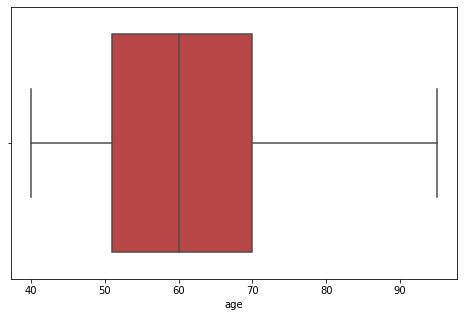

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x='age')



We observe no outliers in the age variable. Unsurprisingly we also see that more than 50 percent of our patients are aged between 50 and 70.


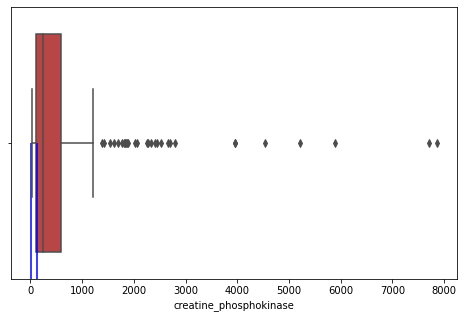

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x='creatine_phosphokinase')
plt.vlines(10,0,0.5, colors = 'b')
plt.vlines(120,0,0.5, colors = 'b')



Interestingly, we observe numerous outliers in the levels of creatine phosphokinase. But we also notice that all these outliers are outside the normal range (highlighted by the blue lines on the plot) and hence need not to be removed. A possible explanation for this could be that majority of the patients suffering heart failure have higher levels of creatine phosphokinase in their blood, since a high amount of this constituent indicates muscle weakness or breakdown.



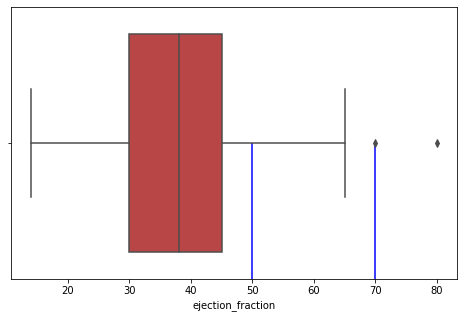

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot( data = df, x='ejection_fraction')
plt.vlines(50,0,0.5, colors = 'b')
plt.vlines(70,0,0.5, colors = 'b')



We have just 2 outliers in this and again the outliers lie outside the normal ranges for ejection fraction. Since we are working with the dataset of heart failure patients, it is not very surprising that majority of the patients have ejection factors below the normal range of 50.



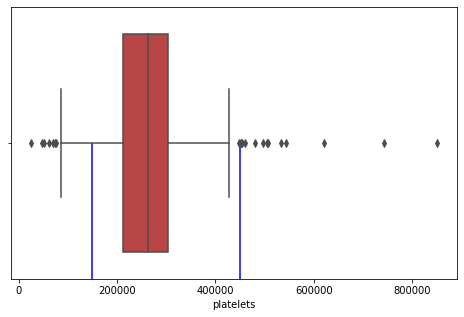

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x='platelets')
plt.vlines(150000,0,0.5, colors = 'b')
plt.vlines(450000,0,0.5, colors = 'b')



Most of the patients have their platelets in the normal ranges highlighted on the plot; however we still get a few outliers. After research, we found that it is possible to have platelets outside the normal range so treating these values as outliers might disrupt our predictions later.
We observe a similar trend that more than 50 percent patients have the serum creatinine levels in the normal range but a lot of patients have very high levels of it which may indicate some sort of underlying condition.


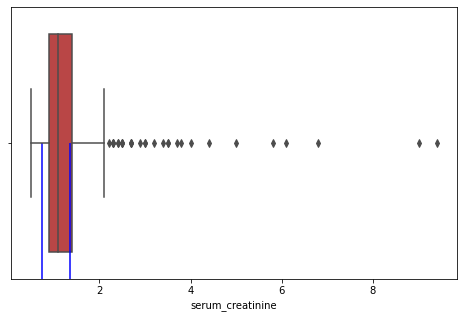

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot( data = df, x='serum_creatinine')
plt.vlines(0.74,0,0.5, colors = 'b')
plt.vlines(1.35,0,0.5, colors = 'b')

We observe a similar trend that more than 50 percent patients have the serum creatinine levels in the normal range but a lot of patients have very high levels of it which may indicate some sort of condition.

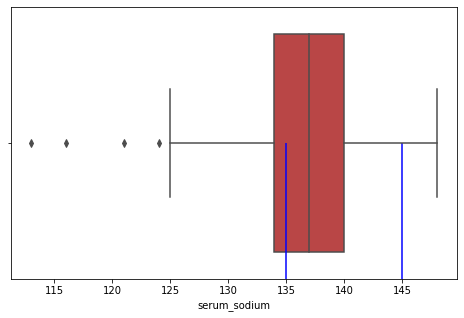

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x='serum_sodium')
plt.vlines(135,0,0.5, colors = 'b')
plt.vlines(145,0,0.5, colors = 'b')




Here, most of our data lies within the acceptable range, although some patients have levels lower than the normal range of serum sodium, which may again indicate some underlying condition.

An important thing to note here is that we will not be removing any outliers since we are dealing with patients who are very likely to have abnormal amounts of different blood constituents. Removing these would leave us with data within the normal ranges only and might not be helpful in later sections as we develop a prediction model.

In [ ]:
NumberOfPatients = int(df.age.max() - df.age.min())

### Assessing survival rates

We would like to see how sex or the presence of different blood consitituents affected the death rate of patients in our dataset.

First, let us take a look at the gender:


Text(0.5, 1.0, 'Survival Percentage in Females')

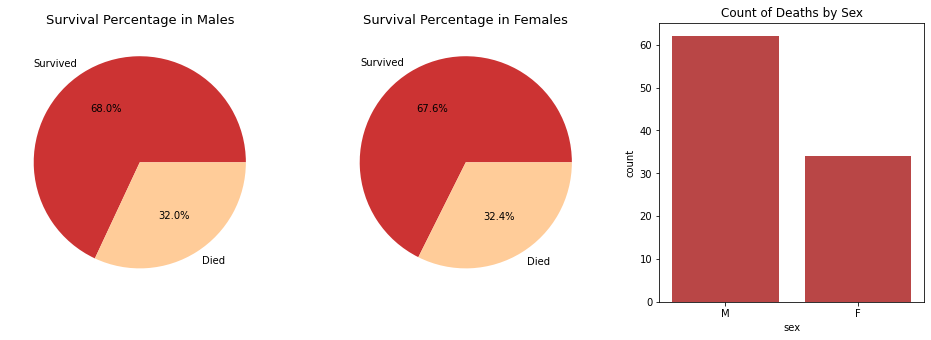

In [ ]:
fig, plot = plt.subplots(1,3, figsize = (14,5))
fig.tight_layout(pad=3.0)
sns.countplot(ax = plot[2], x='sex', hue = 'death_event', data = df[df['death_event']==1])
plot[2].get_legend().remove()
plot[2].set_title('Count of Deaths by Sex')
d1 = df[(df['death_event']==0) & (df['sex']=='M')]
d2 = df[(df['death_event']==1) & (df["sex"]=='M')]
d3 = df[(df['death_event']==0) & (df["sex"]=='F')]
d4 = df[(df['death_event']==1) & (df["sex"]=='F')]
value1 = [len(d1),len(d2)]
value2 = [len(d3),len(d4)]
label1 = ['Survived', 'Died']
label2 = ['Survived', 'Died']
plot[0].pie(x= value1, autopct='%1.1f%%', labels=label1)
plot[1].pie(x= value2, autopct='%1.1f%%', labels=label2)
plot[0].set_title('Survival Percentage in Males', fontsize = 13)
plot[1].set_title('Survival Percentage in Females', fontsize = 13)

As seen from the pie chart, the proportion of death among females is almost the same as the proportion of death among males in our dataset. A numeric analysis of deaths would not have given this result, as shown in the bar plot, since our dataset is unbalanced and hence proportions are more revealing than counts.

Text(0.5, 1.0, 'Survival Percentage for Smokers')

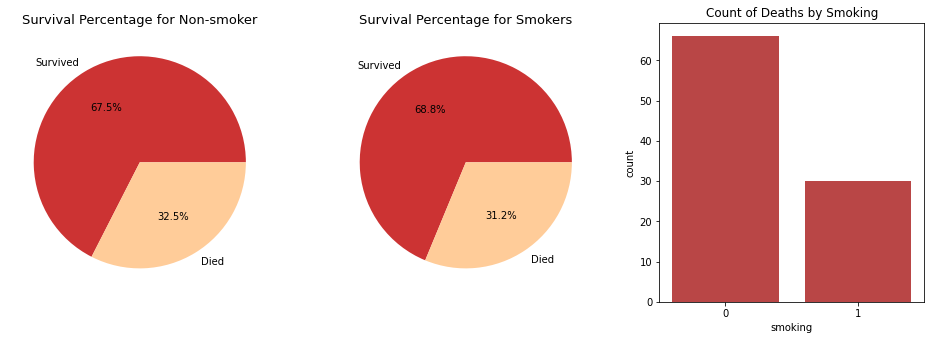

In [ ]:
fig, plot = plt.subplots(1,3, figsize = (14,5))
fig.tight_layout(pad=3.0)
sns.countplot(ax = plot[2], x='smoking', hue = 'death_event', data = df[df['death_event']==1])
plot[2].get_legend().remove()
plot[2].set_title('Count of Deaths by Smoking')
d1 = df[(df['death_event']==0) & (df['smoking']==0)]
d2 = df[(df['death_event']==1) & (df['smoking']==0)]
d3 = df[(df['death_event']==0) & (df['smoking']==1)]
d4 = df[(df['death_event']==1) & (df['smoking']==1)]
value1 = [len(d1),len(d2)]
value2 = [len(d3),len(d4)]
label1 = ['Survived', 'Died']
label2 = ['Survived', 'Died']
plot[0].pie(x= value1, autopct='%1.1f%%', labels=label1)
plot[1].pie(x= value2, autopct='%1.1f%%', labels=label2)
plot[0].set_title('Survival Percentage for Non-smoker', fontsize = 13)
plot[1].set_title('Survival Percentage for Smokers', fontsize = 13)

We again see that more non-smokers died compared to smokers,

Text(0.5, 1.0, 'Survival Percentage for Diabetic')

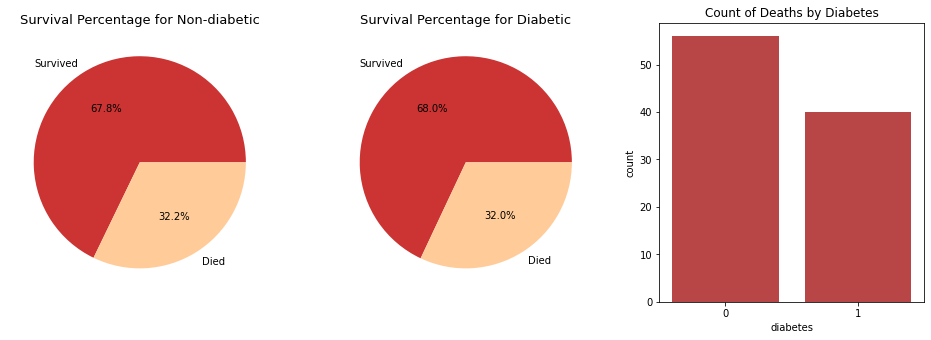

In [ ]:
fig, plot = plt.subplots(1,3, figsize = (14,5))
fig.tight_layout(pad=3.0)
sns.countplot(ax = plot[2], x='diabetes', hue = 'death_event', data = df[df['death_event']==1])
plot[2].get_legend().remove()
plot[2].set_title('Count of Deaths by Diabetes')
d1 = df[(df['death_event']==0) & (df['diabetes']==0)]
d2 = df[(df['death_event']==1) & (df['diabetes']==0)]
d3 = df[(df['death_event']==0) & (df['diabetes']==1)]
d4 = df[(df['death_event']==1) & (df['diabetes']==1)]
value1 = [len(d1),len(d2)]
value2 = [len(d3),len(d4)]
label1 = ['Survived', 'Died']
label2 = ['Survived', 'Died']
plot[0].pie(x= value1, autopct='%1.1f%%', labels=label1)
plot[1].pie(x= value2, autopct='%1.1f%%', labels=label2)
plot[0].set_title('Survival Percentage for Non-diabetic', fontsize = 13)
plot[1].set_title('Survival Percentage for Diabetic', fontsize = 13)

Looking at the proportion of people with and without diabetes, we observe the same trend as gender: more non-diabetic patients passed away, but the proportion of people who died with and without diabetes remains the same.

Text(0.5, 1.0, 'Survival Percentage for High Blood Pressure')

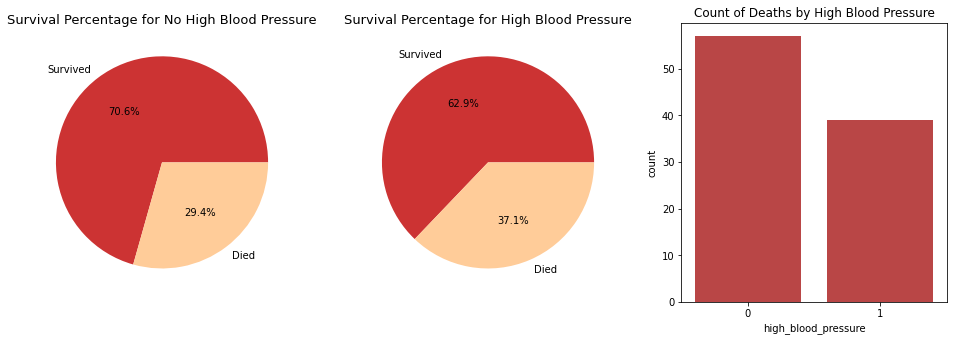

In [ ]:
fig, plot = plt.subplots(1,3, figsize = (14,5))
fig.tight_layout(pad=3.0)
sns.countplot(ax = plot[2], x='high_blood_pressure', hue = 'death_event', data = df[df['death_event']==1])
plot[2].get_legend().remove()
plot[2].set_title('Count of Deaths by High Blood Pressure')
d1 = df[(df['death_event']==0) & (df['high_blood_pressure']==0)]
d2 = df[(df['death_event']==1) & (df['high_blood_pressure']==0)]
d3 = df[(df['death_event']==0) & (df['high_blood_pressure']==1)]
d4 = df[(df['death_event']==1) & (df['high_blood_pressure']==1)]
value1 = [len(d1),len(d2)]
value2 = [len(d3),len(d4)]
label1 = ['Survived', 'Died']
label2 = ['Survived', 'Died']
plot[0].pie(x= value1, autopct='%1.1f%%', labels=label1)
plot[1].pie(x= value2, autopct='%1.1f%%', labels=label2)
plot[0].set_title('Survival Percentage for No High Blood Pressure', fontsize = 13)
plot[1].set_title('Survival Percentage for High Blood Pressure', fontsize = 13)

For patients with high blood pressure though, we observe the proportion of deaths among patients with high blood pressure were 7.7% more than the proportion of deaths among patients who did not have high blood pressure. This suggests a correlation between deaths and high blood pressure, although we cannot assume causality at this point.

Text(0.5, 1.0, 'Survival Percentage for Anaemia')

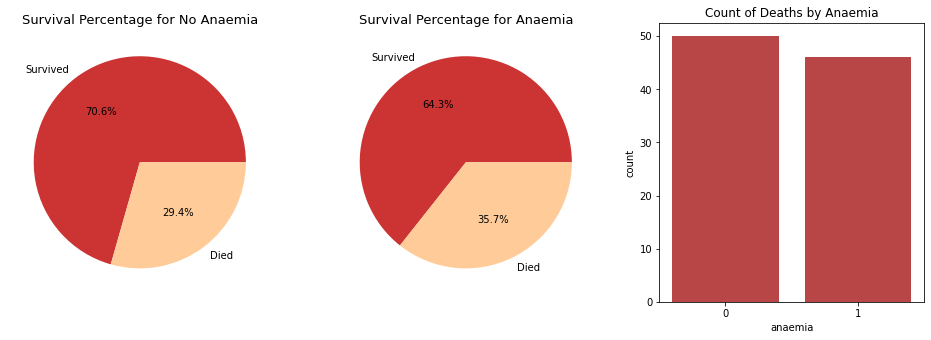

In [ ]:
fig, plot = plt.subplots(1,3, figsize = (14,5))
fig.tight_layout(pad=3.0)
sns.countplot(ax = plot[2], x='anaemia', hue = 'death_event', data = df[df['death_event']==1])
plot[2].get_legend().remove()
plot[2].set_title('Count of Deaths by Anaemia')
d1 = df[(df['death_event']==0) & (df['anaemia']==0)]
d2 = df[(df['death_event']==1) & (df['anaemia']==0)]
d3 = df[(df['death_event']==0) & (df['anaemia']==1)]
d4 = df[(df['death_event']==1) & (df['anaemia']==1)]
value1 = [len(d1),len(d2)]
value2 = [len(d3),len(d4)]
label1 = ['Survived', 'Died']
label2 = ['Survived', 'Died']
plot[0].pie(x= value1, autopct='%1.1f%%', labels=label1)
plot[1].pie(x= value2, autopct='%1.1f%%', labels=label2)
plot[0].set_title('Survival Percentage for No Anaemia', fontsize = 13)
plot[1].set_title('Survival Percentage for Anaemia', fontsize = 13)

Again, analyzing plots for anaemia, we observe that the proportion of deaths among patients with anaemia were 6.6% more than the proportion of deaths among patients without anaemia. The presence of anaemia among patients also suggests a relationship with the deaths.

### A further in-depth analysis of smoking and blood consitutents

Let us now look at how smoking practices and certain blood constituents affect heart failure rates for different age groups.A common perception is that middle-aged people show the greatest resistance to heart diseases, so let us see if our dataset seems to reaffirm this statement.

  



In [ ]:
fig = px.violin(df, y="age", x="sex", color="death_event", box=True, points="all", hover_data=df.columns, title='Distribution of death and sex with respect to age', color_discrete_map={0: palette[1], 1: palette[0]})
fig.show()

From the wider spread of the violin plot we can say that the survival rate is higher for ages 40 to 70. However, the chances of not surviving are spread out through all ages. We can also observe that the survival is high for males in the ages of 50 to 60 whereas it's higher for females in the ages of 60 to 70.

In [ ]:
fig = px.violin(df, y="age", x="smoking", color="death_event", box=True, points="all", hover_data=df.columns, title='Distribution of Death and Smoking with respect to Age', color_discrete_map={0: palette[1], 1: palette[0]})
fig.show()

Let us try the same analysis for survival rate of smokers with respect to age.

From this plot, we observe that the survival rate at an older age (e.g. 70+) are higher for non-smokers compared to smokers. From smokers, more people survived in the age bracket of 50 to 60, whereas more non-smoker survived in the ages 50-70.

In [ ]:
fig = px.violin(df, y="age", x="diabetes", color="death_event", box=True, points="all", hover_data=df.columns, title='Distribution of Death and Diabetes with respect to Age', color_discrete_map={0: palette[1], 1: palette[0]})
fig.show()


Observing this plot, we notice that a large number of both, diabetic and non-diabetic, patients survived in the ages of 40 to 70. But we also see that for ages above 70 there is no case of survival for a diabetic patient.

In [ ]:
fig = px.violin(df, y="age", x="high_blood_pressure", color="death_event", box=True, points="all", hover_data=df.columns, title='Distribution of Death and High Blood Pressure with respect to Age', color_discrete_map={0: palette[1], 1: palette[0]})
fig.show()

      
Some of the key points to take from this plot include no survival cases in the presence of high blood pressure for ages above 80. However, in case of no high blood pressure, the survival cases are spread out through all ages and we might say that it is indicative of a higher chance of survival if an individual does not have high blood pressure. This is something we can explore going forward.

In [ ]:
fig = px.violin(df, y="age", x="anaemia", color="death_event", box=True, points="all", hover_data=df.columns, title='Distribution of Death and Anaemia with respect to Age', color_discrete_map={0: palette[1], 1: palette[0]})
fig.show()


Given the wider spread of the plot for patients who survived, we might say that a lot of patients survived despite having anaemia. We also see that the survival cases are higher for people in the age group of 50 to 70.

## **Distribution of Creatine Phosphokinase Vs Death_Event**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df[df['death_event']==0]['creatine_phosphokinase'],
    histnorm="",
    name='death_event = 0',
    marker_color=palette[1]
))
fig.add_trace(go.Histogram(
    x=df[df['death_event']==1]['creatine_phosphokinase'],
    histnorm="",
    name='death_event = 1',
    marker_color=palette[0]
))
fig.add_shape(type="line",
    x0=10, y0=0, x1=10, y1=95,
    line=dict(color="RoyalBlue",width=1)
)
fig.add_shape(type="line",
    x0=120, y0=0, x1=120, y1=95,
    line=dict(color="RoyalBlue",width=1)
)

fig.update_layout(
    title_text='Distribution of Creatine Phosphokinase Vs Death_Event',
    xaxis_title_text='creatine_phosphokinase',
    yaxis_title_text='Count',
    bargap=0.2,
    bargroupgap=0.3
)

fig.show()

The distribution of patients who survived within normal creatine phosphokinase (CPK) levels are considerably more than those who did not survive. However, as we move outside the normal range, the number of patients who survived are drastically decreasing, and as we move towards the upper extreme (≥5800) of CPK levels, we only seem to find patients who did not survive.

## **Distribution of Ejection Fraction Vs Death_Event**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df[df['death_event']==0]['ejection_fraction'],
    histnorm="",
    name='death_event = 0',
    marker_color=palette[1]
))
fig.add_trace(go.Histogram(
    x=df[df['death_event']==1]['ejection_fraction'],
    histnorm="",
    name='death_event = 1',
    marker_color=palette[0]
))
fig.add_shape(type="line",
    x0=50, y0=0, x1=50, y1=71,
    line=dict(color="RoyalBlue",width=1)
)
fig.add_shape(type="line",
    x0=70, y0=0, x1=70, y1=71,
    line=dict(color="RoyalBlue",width=1)
)

fig.update_layout(
    title_text='Distribution of Ejection Fraction Vs Death_Event',
    xaxis_title_text='ejection_fraction',
    yaxis_title_text='Count',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()

The distribution of patients who survived within or close to the normal Ejection Fraction levels are considerably more than those who did not survive. However, as we move outside the normal range, the number of patients who survived are considerably decreasing, and as we move towards the lower extreme of the Ejection Fraction levels, there are considerably more patients who did not survive than those who did.

### **Distribution of Platelets Vs Death_Event**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df[df['death_event']==0]['platelets'],
    histnorm="",
    name='death_event = 0',
    marker_color=palette[1]
))
fig.add_trace(go.Histogram(
    x=df[df['death_event']==1]['platelets'],
    histnorm="",
    name='death_event = 1',
    marker_color=palette[0]
))
fig.add_shape(type="line",
    x0=150000, y0=0, x1=150000, y1=40,
    line=dict(color="RoyalBlue",width=1)
)
fig.add_shape(type="line",
    x0=450000, y0=0, x1=450000, y1=40,
    line=dict(color="RoyalBlue",width=1)
)

fig.update_layout(
    title_text='Distribution of Platelets Vs Death_Event',
    xaxis_title_text='platelets',
    yaxis_title_text='Count',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()

The distribution of patients who survived within the normal Platelets levels are considerably more, especially towards the middle range, than those who did not survive. However, as we move outside the normal range, the number of patients who survived and did not survive are almost identical and low in count.

### **Distribution of Serum Creatinine Vs Death_Event**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df[df['death_event']==0]['serum_creatinine'],
    histnorm="",
    name='death_event = 0',
    marker_color=palette[1]
))
fig.add_trace(go.Histogram(
    x=df[df['death_event']==1]['serum_creatinine'],
    histnorm="",
    name='death_event = 1',
    marker_color=palette[0]
))
fig.add_shape(type="line",
    x0=0.74, y0=0, x1=0.74, y1=142,
    line=dict(color="RoyalBlue",width=1)
)
fig.add_shape(type="line",
    x0=1.35, y0=0, x1=1.35, y1=142,
    line=dict(color="RoyalBlue",width=1)
)

fig.update_layout(
    title_text='Distribution of Serum Creatinine Vs Death_Event',
    xaxis_title_text='serum_creatinine',
    yaxis_title_text='Count',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()

The distribution of patients who survived within the normal Serum Creatinine levels are significantly more than those who did not survive. However, as we move outside the normal range, towards the upper extreme, the number of patients who did not survive drastically decrease until the number of patients who did not survive are more than those who did, in the same range of Serum Creatinine levels. This might be indicative of a correlation; however, this conclusion is not concrete at this stage.

### **Distribution of Serum Sodium Vs Death_Event**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df[df['death_event']==0]['serum_sodium'],
    histnorm="",
    name='death_event = 0',
    marker_color=palette[1]
))
fig.add_trace(go.Histogram(
    x=df[df['death_event']==1]['serum_sodium'],
    histnorm="",
    name='death_event = 1',
    marker_color=palette[0]
))
fig.add_shape(type="line",
    x0=135, y0=0, x1=135, y1=34,
    line=dict(color="RoyalBlue",width=1)
)
fig.add_shape(type="line",
    x0=145, y0=0, x1=145, y1=34,
    line=dict(color="RoyalBlue",width=1)
)

fig.update_layout(
    title_text='Distribution of Serum Sodium Vs Death_Event',
    xaxis_title_text='serum_sodium',
    yaxis_title_text='Count',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()

The distribution of patients who survived within the normal Serum Sodium levels are considerably more than those who did not survive. However, as we move outside the normal range, at both sides of the extreme, the number of patients who survived are either considerably lower than that in the normal range or are lower than that of those who did not survive in the same range.

## Checkpoint 4

**Can we predict heart failure based on blood quality data?**

What are at risk populations?

To what extent does Smoking bias Heart Failure?

To what extent does Diabetes bias Heart Failure?

What combination of factors contribute more than other individual factors for Heart Failure?


### Tasks

Causal graphs?

Statistical inference
1. If our dataset matches general statistics - dataset
  -  null/alt for heart failure for people of classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure
  - null/alt for individual features for people of classes III or IV of New York Heart Association (NYHA) classification of the stages heart failure
    - Smoking
    - Anemia
    - diabetes



Machine learning
1. Logistic Regression - death yes/no: for binary features  

Blogging


## Statistical Inference

In this section on statistical inference we want to confirm the health of our dataset. To do this, we will test to see how accurately our dataset corresponds to the general population. We will achieve this by hypothesis testing on features hard to test otherwise.

We will come up with a null and alternative hypothesis for each feature and with the help of bootstrapping we will come to a conclusion.

We are interested in confirming **Anemia**, **Smoking** and **Diabetes** in our population and how that matches with the population in general.

### Helper Functions
This sections contains helper functions that we will be using for statistical inference.

#### Observed Visualization

In [ ]:
LENGTH = len(df)

In [ ]:
def observed_stat(probability):
    return np.abs(NULL_STAT - probability)

In [ ]:
def get_test_stat(binary_attribute):
  return df[binary_attribute].mean() # same as (positive count) / (total count) for binary variables

In [ ]:
def simulate_statistic(null_stat, length, size):
    sim = np.random.multinomial(length, [null_stat, 1-null_stat], size=size)

    f = lambda arr: np.divide(arr[0], length)

    ret = [observed_stat(f(arr)) for arr in sim]

    return ret

In [ ]:
def visualize_simulated_and_observed(attribute, observed, simulated_stat):
  plt.figure(figsize=(10,10))

  hist = plt.hist(simulated_stat)

  plt.title("Simulated statistic and observed value of " + attribute)
  plt.xlabel("Absolute distance between the observed prevalence and the true population prevalence")
  plt.ylabel("Frequency")
  plt.axvline(observed, c='royalblue',label="Observed value in our dataset")
  plt.legend(loc="upper right")
  plt.show()


In [ ]:
def run_test(attribute):
  test_stat = get_test_stat(attribute)
  simulated_stat = simulate_statistic(test_stat, LENGTH, 5000)
  observed = observed_stat(test_stat)
  # print("Observed stat",observed)
  visualize_simulated_and_observed(attribute, observed, simulated_stat)

#### Bootstrapping

In [ ]:
def visualize_boot(attribute, boots):
  plt.figure(figsize=(10,10))
  plt.hist(boots)
  plt.axvline(df[attribute].mean(), c='royalblue', label="Mean of "+ attribute + " in our dataset")
  plt.axvline(NULL_STAT, c='y', label="Mean of "+ attribute + " in general population")
  plt.legend()
  plt.xlabel("(Simluated) means of " + attribute + " from the bootstrapping process")
  plt.ylabel("Frequency")
  plt.title("Bootstrap frequencies with the original dataset mean drawn")
  plt.show()

In [ ]:
from scipy import stats
from IPython.display import display, Markdown

def bootstrap(attribute):
  boot = df.sample(100, replace=True)

  def mean_of_attribute(attribute,df):
    return df[attribute].mean()

  boots = [mean_of_attribute(attribute,boot.sample(100, replace=True)) for x in range(10000)]

  visualize_boot(attribute,boots)
  # _, pval = stats.ttest_1samp(boots,NULL_STAT)

  # print(stats.ttest_1samp(boots,NULL_STAT))
  # zscore = (NULL_STAT - np.mean(boots) / np.std(boots))


  display(Markdown("#### 95% confidence interval"
                   + "\nLower bound: " + str(np.percentile(boots, 2.5))
                   + "\n\nUpper bound: " + str( np.percentile(boots, 97.5))
                  #  + "\n\n**P-Value: " + str(pval) + "**"
                  )
        )

  display(Markdown("#### Conclusion \nOur null statistic was " + str(NULL_STAT)))

  if NULL_STAT >= np.percentile(boots, 2.5) and NULL_STAT <= np.percentile(boots, 97.5):
    display(Markdown("Our null statistic is within our 95% confidence interval."))
    display(Markdown("Therefore, we **fail to reject** the null statistic and will use our dataset for further analysis"))

  else:
    display(Markdown("Our null statistic is outside our 95% confidence interval."))
    display(Markdown("Therefore, we **reject** the null statistic"))

  # if pval > 0.05:
  #   display(Markdown("We fail to reject the null hypothesis"))
  # else:
  #   display(Markdown("We reject the null hypothesis"))

  # print(zscore)
  # print(boots)
  # print(np.sum(boots))


In [ ]:
# ?stats.ttest_1samp()


### Anemia

According to [this research article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3129268/), the prevelance of Anemia for individuals classified within class III or IV of NYHA classification is 0.19.

**Null:** The probability that a participant within our dataset is anemic is equivalent to the prevelence of Anemia in the general population of those classified within class III or IV of NYHA classification of heart failure.

**Alternative:** The probability that a participant within our dataset is not anemic is NOT equivalent to the prevelence of Anemia in the general population of those classified within class III or IV of NYHA classification of heart failure.


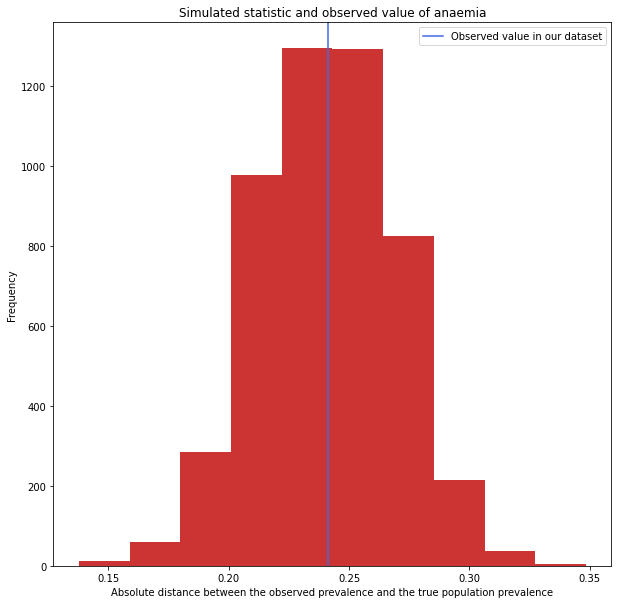

In [ ]:
# IMPORTANT: Set NULL STAT attribute before running test
NULL_STAT = 0.19
run_test('anaemia')

#### Bootstrapping

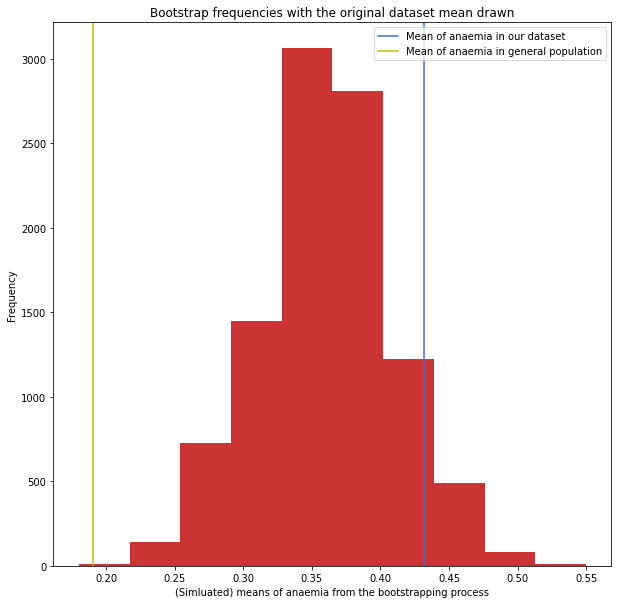

#### 95% confidence interval
Lower bound: 0.27

Upper bound: 0.45

#### Conclusion 
Our null statistic was 0.19

Our null statistic is outside our 95% confidence interval.

Therefore, we **reject** the null statistic

In [ ]:
NULL_STAT = 0.19
bootstrap('anaemia')

Based on our results, it is evident that the prevalence of Anemia in our dataset is NOT equivalent to the prevalence of Anemia in the general population.


### Diabetes  

According to [this research article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3129268/), the prevelance of Diabetes for individuals classified within class III or IV of NYHA classification is 0.304.

**Null:** The probability that a participant within our dataset is diabetic is equivalent to the prevelence of Diabetes in the general population of those classified within class III or IV of NYHA classification of heart failure.

**Alternative:** The probability that a participant within our dataset is diabetic is NOT equivalent to the prevelence of Diabetes in the general population of those classified within class III or IV of NYHA classification of heart failure.


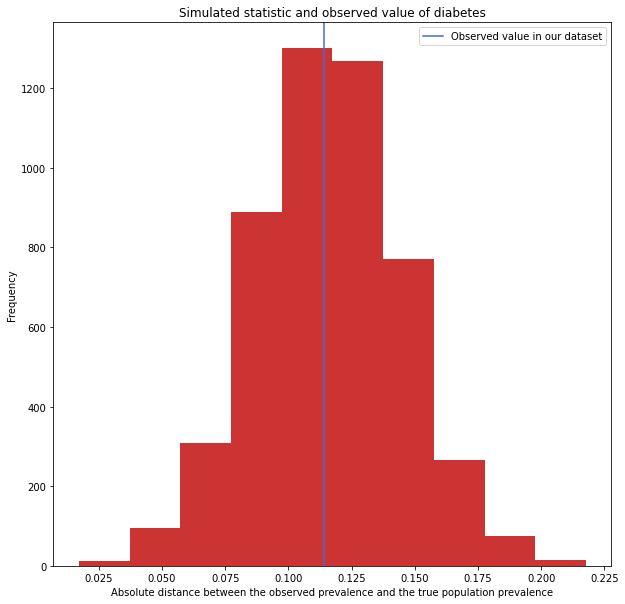

In [ ]:
# IMPORTANT: Set NULL STAT attribute before running test
NULL_STAT = 0.304
run_test('diabetes')

#### Bootstrapping

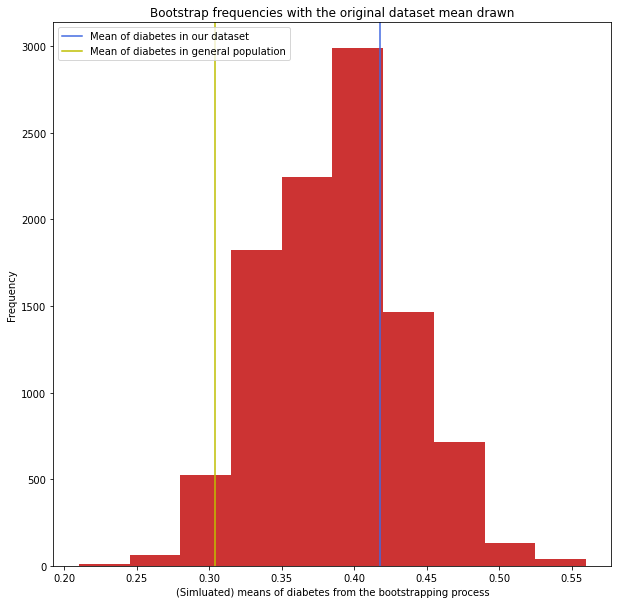

#### 95% confidence interval
Lower bound: 0.3

Upper bound: 0.49

#### Conclusion 
Our null statistic was 0.304

Our null statistic is within our 95% confidence interval.

Therefore, we **fail to reject** the null statistic and will use our dataset for further analysis

In [ ]:
NULL_STAT = 0.304
bootstrap('diabetes')


We fail to reject the null statistic. The prevalence of diabetes in our dataset is evidently equal to the prevalence of diabetes in the general population, as shown by our findings.


### Smoking  

According to [this research article](https://bmcmedicine.biomedcentral.com/articles/10.1186/s12916-019-1351-4), that correlates Tobacco Smoking and Cardiovascular Disease, the prevelance of smoking in cardiovascular diseases among those individuals that fall between the age range of 45-64 and classified within class III or IV of NYHA classification is 0.355.

**Null:** The probability that a participant within our dataset smokes is equivalent to the prevelence of smoking in the general population of those classified within class III or IV of NYHA classification of heart failure.

**Alternative:** The probability that a participant within our dataset smokes is NOT equivalent to the prevelence of smoking in the general population of those classified within class III or IV of NYHA classification of heart failure.


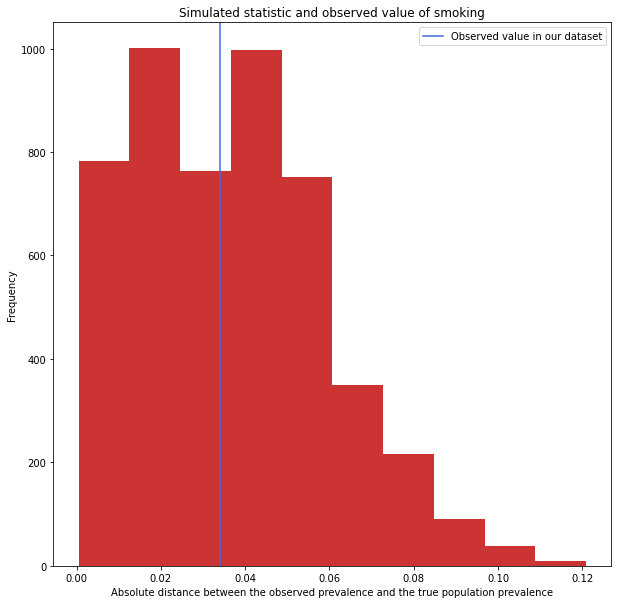

In [ ]:
# IMPORTANT: Set NULL STAT attribute before running test
NULL_STAT = 0.355
run_test('smoking')

#### Bootstrapping

We are going to use our test statistic to simulate 10,000 values under the null statistic.

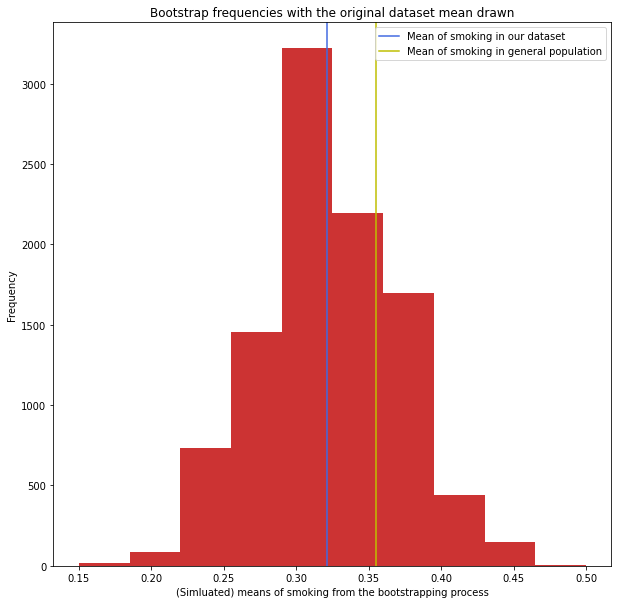

#### 95% confidence interval
Lower bound: 0.23

Upper bound: 0.41

#### Conclusion 
Our null statistic was 0.355

Our null statistic is within our 95% confidence interval.

Therefore, we **fail to reject** the null statistic and will use our dataset for further analysis

In [ ]:
NULL_STAT = 0.355
bootstrap('smoking')

We see that we fail to reject the null hypothesis. Our findings show that the prevalence of smoking in our sample is equivalent to the prevalence of smoking in the general population.

#Conclusion of Statistical Inference
From our findings of statistical analysis of all three individual features (Anemia, Diabetes, Smoking), we rejected the null hypothesis of only Anemia. It is notable that even though Anemia is a considerable factor in heart failure, it has a prevalence of only 19% of the general population of those classified within class III or IV of NYHA classification of heart failure, while the other two factors have prevalence more than 30%.

Based on the results, as we fail to reject the null hypothesis on a majority of the features, we can assume that our dataset is a good representative of the general population and as such we will use our dataset for further analysis.

# Machine Learning

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # For splitting dataset
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, multilabel_confusion_matrix # Evaluation metrics
from sklearn.pipeline import make_pipeline # Creating a Pipeline though not required. Only for efficiency
from sklearn.preprocessing import StandardScaler # Scaling data
from sklearn.linear_model import LogisticRegression as LR # Linear Regression Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets


## Data Manipulation for ML

In [ ]:
my_dict = {
    'F': 0,
    'M': 1,
     1 : 1,
     0 : 0
}

df.sex = df.sex.map(my_dict)

X = df.iloc[:,0:11]

# df.head()
X.head()

y = df.iloc[:,-1]
X.head()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


## Data Splitting

We will now be moving into the final stages of our analysis and developing a machine learning model to predict heart failure. In order to decide on an algorithm, we will be implementing the following algorithms on our dataset:
1)	k Nearest Neighbors Classifier
2)	Logistic Regression Classifier
3)	Random Forest Classifier
Our dataset contains records of 299 patients, which is a relatively low number of data points to train a machine learning model, hence we have decided on a 90-10 train-test split in order to develop a reasonable model that is well trained.


In [ ]:
# Split dataset into training set and test set. Choose the test_size parameter yourself.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Printing shapes
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (269, 11) (269,)
Test set: (30, 11) (30,)


## kNN Classifier

1. kNN Classifier
The kNN classifier computes distances between the test point and all the training points and assigns the most frequently occurring label among the k nearest training points to the test point.
The following is a summary of several performance metrics after running the kNN classifier on our data from the scikit-learn library:
*insert screenshot from colab*


Accuracy = 46.666666666666664 %
              precision    recall  f1-score   support

           0       0.52      0.76      0.62        17
           1       0.20      0.08      0.11        13

    accuracy                           0.47        30
   macro avg       0.36      0.42      0.37        30
weighted avg       0.38      0.47      0.40        30



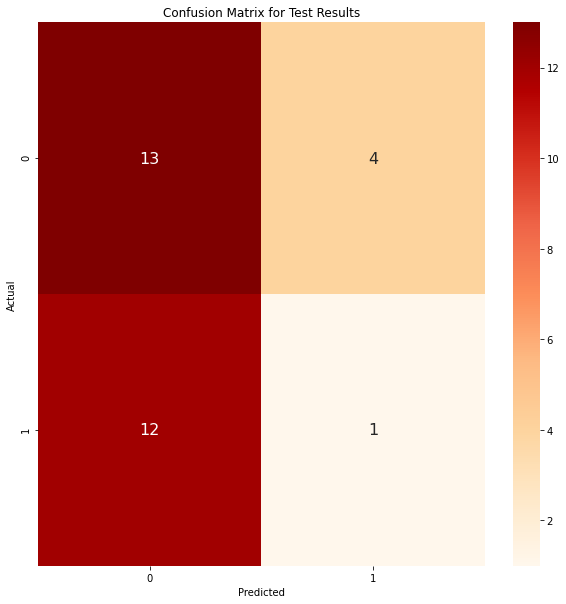

In [ ]:
k = 3

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

accuracy = neigh.score(X_test, y_test)
print("Accuracy =", accuracy*100, "%")

cr = classification_report(y_test, y_pred, labels=[0,1])
print(cr)
#Extracting f1 score
report_kNN = classification_report(y_test, y_pred, output_dict=True )
macro_f1_kNN = report_kNN['macro avg']['f1-score']

cm2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap( cm2, annot=True, fmt = 'd', cmap = 'OrRd', annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Results')
plt.show()


We see that we get a *insert accuracy*% accuracy and a *insert F1 score* F1 score using a kNN classifier.

## Logistic Regression

2. Logistic Regression Classifier
The logistic regression classifier uses training points to compute weights that give the lowest training loss, and then uses these set of weights to determine whether a test point belongs to a certain class using an activation function and a boundary condition. Since the algorithm actively tries to minimize losses, it generally performs better than the kNN algorithm.
The following is a summary of several performance metrics after running the logistic regression classifier on our data from the scikit-learn library. We have allowed 1000 iterations to train weights, and have also employed L2 regularization to prevent overfitting:
*insert screenshot from colab*


Accuracy = 70.0 %
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        17
           1       1.00      0.31      0.47        13

    accuracy                           0.70        30
   macro avg       0.83      0.65      0.63        30
weighted avg       0.80      0.70      0.65        30



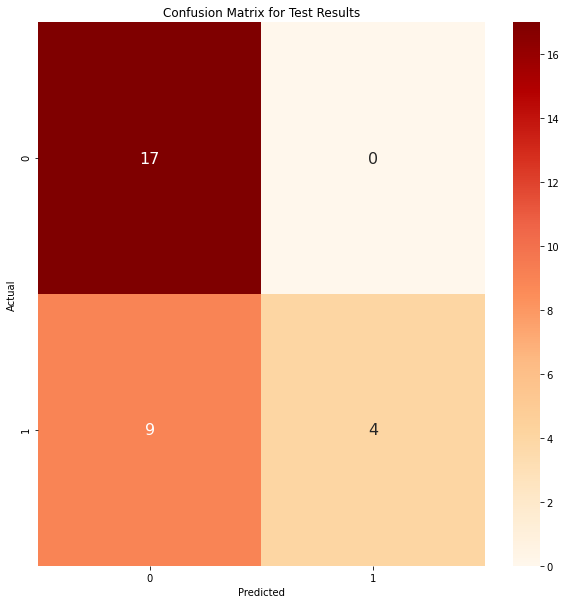

In [ ]:
log = make_pipeline(StandardScaler(), LR(penalty = 'l2', random_state=4, max_iter = 1000))
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

accuracy = log.score(X_test, y_test)
print("Accuracy =", accuracy*100, "%")

cm2 = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, labels=[0,1])
print(cr)
#Extracting f1 score
report_LR = classification_report(y_test, y_pred, output_dict=True )
macro_f1_LR = report_LR['macro avg']['f1-score']
plt.figure(figsize=(10,10))
sns.heatmap( cm2, annot=True, fmt = 'd', cmap = 'OrRd', annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Results')
plt.show()

We see that we get a 83.3% accuracy and a 0.84 F1 score using our logistic regression classifier.

## 3. Random Forest

3. Random Forest Classifier
Random Forest Classifier is a very effective and popular algorithm that constructs multiple decision trees in the training instance and outputs the class that is the mode of the classes of the individual trees in the test instance. Another advantage of using this algorithm is that it allows us to assign certain weights to classes which helps to eliminate any issues that a data imbalance might create. Since our dataset is unbalanced, we have assigned weight 1 to the ‘0’ label and weight 2 to the ‘1’ label. We have also allowed 500 trees to be created in order to compensate for the lack of data points in our dataset.
The following is a summary of several performance metrics after running the random forest classifier on our data from the scikit-learn library:
*insert screenshot from colab*


No handles with labels found to put in legend.


Accuracy = 63.33333333333333 %


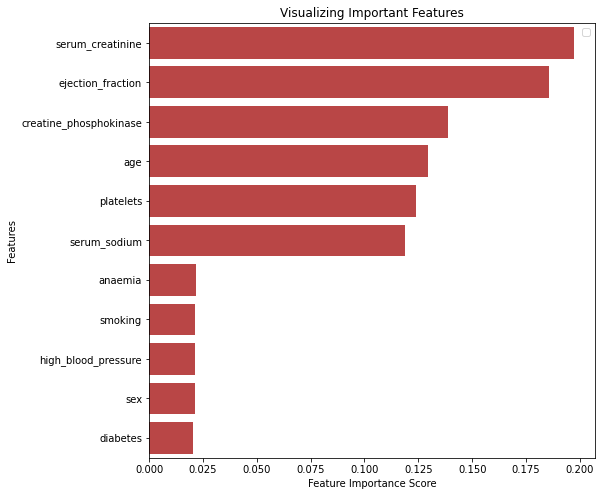

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        17
           1       0.67      0.31      0.42        13

    accuracy                           0.63        30
   macro avg       0.65      0.60      0.58        30
weighted avg       0.64      0.63      0.60        30



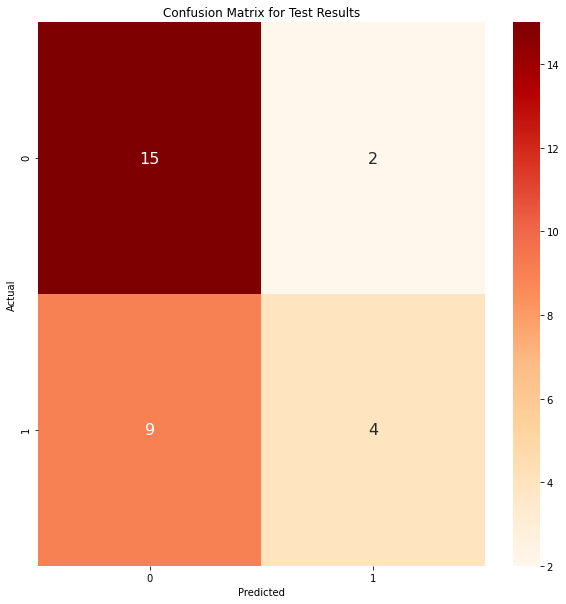

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state= 10, class_weight= {0:1,1:2} )
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy =", accuracy*100, "%")
#Extracting f1 score
report_RF = classification_report(y_test, y_pred, output_dict=True )
macro_f1_RF = report_RF['macro avg']['f1-score']

feature_imp = pd.Series(model.feature_importances_ , index= list(X.columns)).sort_values(ascending=False)
feature_imp
fig, ax = plt.subplots(figsize= (8,8))
sns.barplot(x=feature_imp, y=feature_imp.index, ax = ax, color = '#CC3333')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

cm2 = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, labels=[0,1])
print(cr)
plt.figure(figsize=(10,10))
sns.heatmap( cm2, annot=True, fmt = 'd', cmap = 'OrRd', annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Results')
plt.show()

We see that we get a *insert accuracy*% accuracy and a *insert F1 score* F1 score using a random forest classifier.
To get an overview of how much each attribute is contributing to our model, we constructed a visualization for feature importance.
*insert feature importance graph*
It seems that the top 3 most important features are:
•	Serum creatinine
•	Ejection fraction
•	Age
Interestingly enough, attributes like diabetes, anaemia, sex, high blood pressure and smoking do not contribute much to our prediction.


No handles with labels found to put in legend.


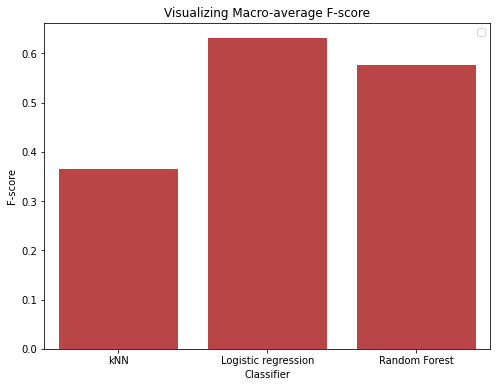

In [ ]:
#Plotting f scores for each model for comaprison
f1 = [macro_f1_kNN, macro_f1_LR, macro_f1_RF]
model = ['kNN', 'Logistic regression', 'Random Forest']
fig, ax = plt.subplots(figsize= (8,6))
sns.barplot(x=model, y=f1, ax = ax, color = '#CC3333')
plt.xlabel('Classifier')
plt.ylabel('F-score')
plt.title("Visualizing Macro-average F-score")
plt.legend()
plt.show()

Lastly, the graph below compares the performance of these three algorithms. We observe that the macro-average F score is lowest for kNN classifier and highest for Random Forest classifier.